In [3]:
import logging
import os
import sys
from typing import Union

import pandas as pd
import numpy as np
import yaml
from numpy.typing import NDArray

import shap
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('inline')
%matplotlib inline
sys.path.append(os.getcwd())

from src.models.model_wrappers import ModelWrapper, model_wrappers
from src.shap_prosit.shap_calculator import ShapCalculator

#tf.get_logger().setLevel(logging.ERROR)

def local_explanation(
    sequence, 
    charge, 
    energy,
    method='HCD',
    ion='y5+1',
    samp=100
):
    space = (30-len(sequence))*[""]
    calc_input = np.array(list(sequence) + space + [str(charge), str(energy), str(method)], dtype='<U4')[None]

    model_wrapper = model_wrappers[config["model_type"]](
        model_path=config["model_path"], mode=ion
    )
    sc = ShapCalculator(ion, val, bgd, model_wrapper=model_wrapper)
    bgd_pred = model_wrapper.make_prediction(bgd)
    bgd_mean = np.mean(bgd_pred)
    
    out_dict = sc.calc_shap_values(calc_input, samp=samp)
    ext = int(ion[1])
    poslambda = lambda a: a-(len(sequence)-ext) if ion[0]=='y' else ext-a-1
    tokens = ['%s_%d'%(b, poslambda(a)) for a,b in enumerate(sequence)]
    explanation = shap.Explanation(out_dict['shap_values'], base_values=bgd_mean, feature_names=tokens)
    
    plt.close()
    matplotlib.use('inline')
    ax = shap.waterfall_plot(explanation, show=False)
    fig = ax.get_figure()
    #fig.set_figheight(6.5)
    #fig.set_figwidth(8)
    #ax.set_title("%s"%sequence, size=20)
    
    return fig

with open("config.yaml", encoding="utf-8") as file:
    config = yaml.safe_load(file)["shap_calculator"]

#if not os.path.exists(config["ion"]):
#   os.makedirs(config["ion"])

# Shuffle validation dataset and split it in background and validation.
val_data = pd.read_parquet("val_inps.parquet")
config['perm_path'] = "./data/hcd/y5+1 Prosit2019/perm.txt"
if config["perm_path"] is None:
    perm = np.random.permutation(np.arange(len(val_data)))
    #np.savetxt(output_path + "/perm.txt", perm, fmt="%d")
else:
    perm = np.loadtxt(config["perm_path"]).astype(int)
bgd_sz = config['bgd_sz']
bgd = np.stack(val_data['full'][perm[:bgd_sz]])
val = np.stack(val_data['full'][perm[bgd_sz:]])

Hello


Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

   peptide_sequences  precursor_charges  collision_energies   intensities  \
0      VKLANPLHFYEAR                  3                  30  8.080599e-02   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
..               ...                ...                 ...           ...   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  5.161847e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  1.616301e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   

             mz annotation  
0    175.118958    b'y1+1'  
0     88.063118  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

   peptide_sequences  precursor_charges  collision_energies   intensities  \
0      VKLANPLHFYEAR                  3                  30  8.080602e-02   
0      VKLANPLHFYEAR                  3                  30  4.963298e-08   
0      VKLANPLHFYEAR                  3                  30  4.963298e-08   
0      VKLANPLHFYEAR                  3                  30  4.963298e-08   
0      VKLANPLHFYEAR                  3                  30  4.963298e-08   
..               ...                ...                 ...           ...   
99  AVLSQPCNTLHLTVLR                  2                  30  3.180974e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  3.180974e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  5.153663e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  1.618086e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  3.180974e-08   

             mz annotation  
0    175.118958    b'y1+1'  
0     88.063118  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

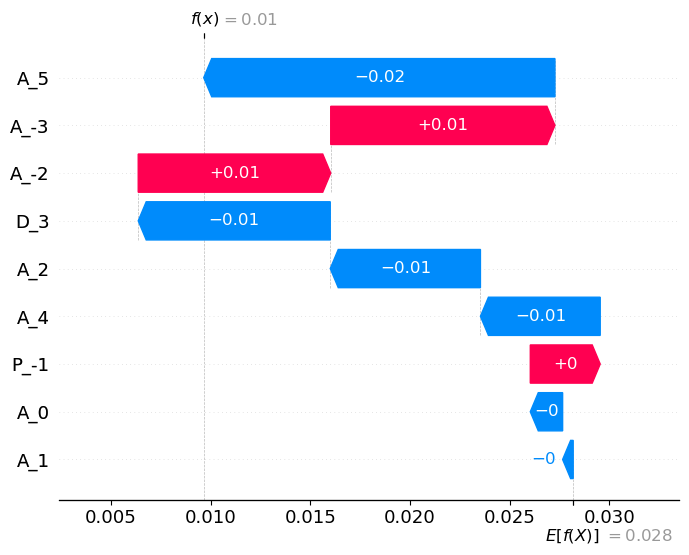

In [13]:
local_explanation("AADAAAPAA", 2, 30, ion='b6+2', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

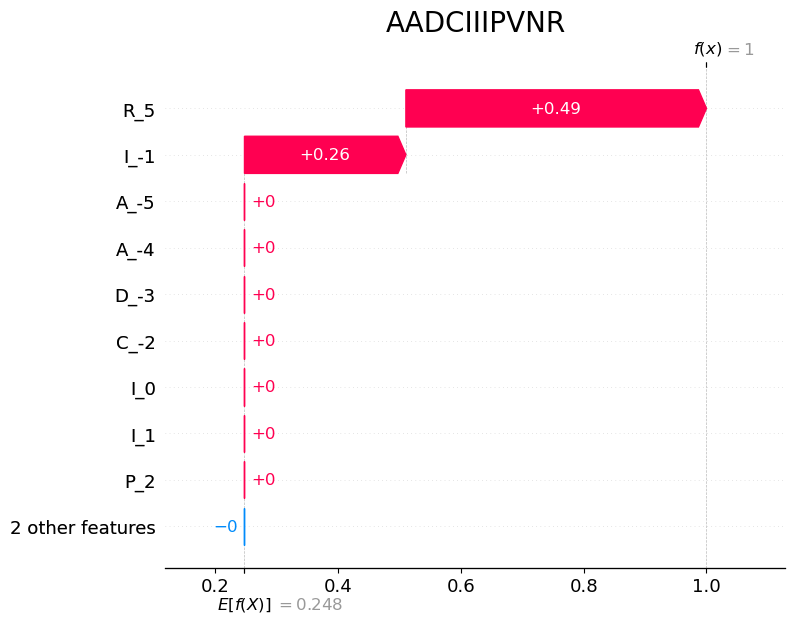

In [9]:
local_explanation("AADCIIIPVNR", 2, 0.3, ion='y6+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

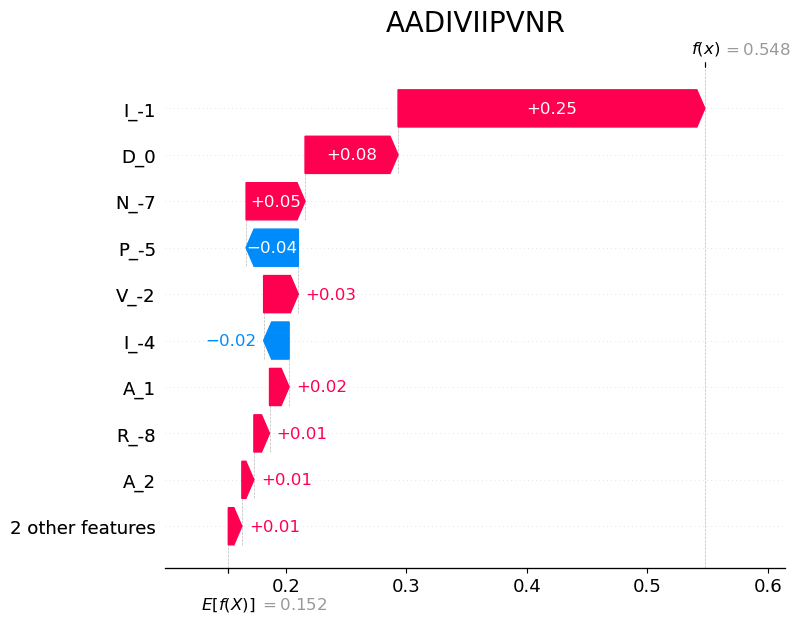

In [15]:
local_explanation("AADIVIIPVNR", 2, 0.3, ion='b3+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

   peptide_sequences  precursor_charges  collision_energies   intensities  \
0      VKLANPLHFYEAR                  3                  30  8.080599e-02   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
..               ...                ...                 ...           ...   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  5.161847e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  1.616301e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   

             mz annotation  
0    175.118958    b'y1+1'  
0     88.063118  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

   peptide_sequences  precursor_charges  collision_energies   intensities  \
0      VKLANPLHFYEAR                  3                  30  8.080599e-02   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
0      VKLANPLHFYEAR                  3                  30  4.962180e-08   
..               ...                ...                 ...           ...   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   
99  AVLSQPCNTLHLTVLR                  2                  30  5.161847e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  1.616301e-03   
99  AVLSQPCNTLHLTVLR                  2                  30  3.181774e-08   

             mz annotation  
0    175.118958    b'y1+1'  
0     88.063118  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

   peptide_sequences  precursor_charges  collision_energies   intensities  \
0        VKLANPLHFYE                  2                  30  2.633823e-01   
0        VKLANPLHFYE                  2                  30  8.748298e-08   
0        VKLANPLHFYE                  2                  30  8.748298e-08   
0        VKLANPLHFYE                  2                  30  8.748298e-08   
0        VKLANPLHFYE                  2                  30  2.808228e-01   
..               ...                ...                 ...           ...   
99       AVLSQPCNTLH                  2                  30  3.145722e-08   
99       AVLSQPCNTLH                  2                  30  3.145722e-08   
99       AVLSQPCNTLH                  2                  30  3.145722e-08   
99       AVLSQPCNTLH                  2                  30  3.145722e-08   
99       AVLSQPCNTLH                  2                  30  3.145722e-08   

             mz annotation  
0    148.060440    b'y1+1'  
0     74.533852  

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         AKLANPLHFYE                  2                  30  2.838703e-01   
0         AKLANPLHFYE                  2                  30  9.611675e-08   
0         AKLANPLHFYE                  2                  30  9.611675e-08   
0         AKLANPLHFYE                  2                  30  9.611675e-08   
0         AKLANPLHFYE                  2                  30  3.306668e-01   
..                ...                ...                 ...           ...   
999       AADCQSIPVRR                  2                  30  2.700438e-08   
999       AADCQSIPVRR                  2                  30  2.700438e-08   
999       AADCQSIPVRR                  2                  30  2.836615e-02   
999       AADCQSIPVRR                  2                  30  1.524853e-01   
999       AADCQSIPVRR                  2                  30  2.700438e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         VKLANSLHFYE                  2                  30  1.784165e-01   
0         VKLANSLHFYE                  2                  30  7.210436e-08   
0         VKLANSLHFYE                  2                  30  7.210436e-08   
0         VKLANSLHFYE                  2                  30  7.210436e-08   
0         VKLANSLHFYE                  2                  30  2.644332e-01   
..                ...                ...                 ...           ...   
999       AADCISIPVLR                  2                  30  3.449000e-08   
999       AADCISIPVLR                  2                  30  3.449000e-08   
999       AADCISIPVLR                  2                  30  3.703903e-04   
999       AADCISIPVLR                  2                  30  3.449000e-08   
999       AADCISIPVLR                  2                  30  3.449000e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         VKLANPLHFYR                  2                  30  1.380598e-01   
0         VKLANPLHFYR                  2                  30  5.911225e-08   
0         VKLANPLHFYR                  2                  30  5.911225e-08   
0         VKLANPLHFYR                  2                  30  5.911225e-08   
0         VKLANPLHFYR                  2                  30  7.229620e-02   
..                ...                ...                 ...           ...   
999       AVDCISIPVLR                  2                  30  3.927343e-08   
999       AVDCISIPVLR                  2                  30  3.927343e-08   
999       AVDCISIPVLR                  2                  30  1.288294e-03   
999       AVDCISIPVLR                  2                  30  3.927343e-08   
999       AVDCISIPVLR                  2                  30  3.927343e-08   

              mz annotation  
0     175.118958    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         VKLCIPIHFYE                  2                  30  1.609249e-01   
0         VKLCIPIHFYE                  2                  30  7.161757e-08   
0         VKLCIPIHFYE                  2                  30  7.161757e-08   
0         VKLCIPIHFYE                  2                  30  7.161757e-08   
0         VKLCIPIHFYE                  2                  30  1.876099e-01   
..                ...                ...                 ...           ...   
999       AALCISINVRR                  2                  30  8.601651e-08   
999       AALCISINVRR                  2                  30  8.601651e-08   
999       AALCISINVRR                  2                  30  2.158056e-01   
999       AALCISINVRR                  2                  30  4.740492e-01   
999       AALCISINVRR                  2                  30  8.601651e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         VKLANPIPFYE                  2                  30  2.729288e-01   
0         VKLANPIPFYE                  2                  30  5.431907e-08   
0         VKLANPIPFYE                  2                  30  7.006223e-03   
0         VKLANPIPFYE                  2                  30  5.431907e-08   
0         VKLANPIPFYE                  2                  30  1.000000e+00   
..                ...                ...                 ...           ...   
999       AADCIPINVRR                  2                  30  3.218053e-08   
999       AADCIPINVRR                  2                  30  3.218053e-08   
999       AADCIPINVRR                  2                  30  2.903968e-02   
999       AADCIPINVRR                  2                  30  7.911692e-02   
999       AADCIPINVRR                  2                  30  3.218053e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         AKLANPLHFRE                  2                  30  2.149621e-02   
0         AKLANPLHFRE                  2                  30  5.014524e-08   
0         AKLANPLHFRE                  2                  30  5.014524e-08   
0         AKLANPLHFRE                  2                  30  5.014524e-08   
0         AKLANPLHFRE                  2                  30  5.158438e-02   
..                ...                ...                 ...           ...   
999       AADCIPIPVLR                  2                  30  1.918019e-08   
999       AADCIPIPVLR                  2                  30  1.918019e-08   
999       AADCIPIPVLR                  2                  30  1.918019e-08   
999       AADCIPIPVLR                  2                  30  1.918019e-08   
999       AADCIPIPVLR                  2                  30  1.918019e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         AKLANSIHVRE                  2                  30  2.507869e-02   
0         AKLANSIHVRE                  2                  30  6.853693e-08   
0         AKLANSIHVRE                  2                  30  6.853693e-08   
0         AKLANSIHVRE                  2                  30  6.853693e-08   
0         AKLANSIHVRE                  2                  30  1.363237e-01   
..                ...                ...                 ...           ...   
999       AADSISINVRH                  2                  30  2.013016e-05   
999       AADSISINVRH                  2                  30  3.509002e-08   
999       AADSISINVRH                  2                  30  5.042559e-02   
999       AADSISINVRH                  2                  30  1.539394e-02   
999       AADSISINVRH                  2                  30  9.929955e-04   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         AKLANSLHFYE                  2                  30  2.147494e-01   
0         AKLANSLHFYE                  2                  30  8.780280e-08   
0         AKLANSLHFYE                  2                  30  8.780280e-08   
0         AKLANSLHFYE                  2                  30  8.780280e-08   
0         AKLANSLHFYE                  2                  30  3.590970e-01   
..                ...                ...                 ...           ...   
999       AVDSQSINTRR                  2                  30  2.112740e-08   
999       AVDSQSINTRR                  2                  30  2.112740e-08   
999       AVDSQSINTRR                  2                  30  1.099458e-02   
999       AVDSQSINTRR                  2                  30  7.245911e-02   
999       AVDSQSINTRR                  2                  30  2.112740e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         VALANPIHFYE                  2                  30  1.350043e-01   
0         VALANPIHFYE                  2                  30  6.506193e-08   
0         VALANPIHFYE                  2                  30  6.506193e-08   
0         VALANPIHFYE                  2                  30  6.506193e-08   
0         VALANPIHFYE                  2                  30  9.515598e-02   
..                ...                ...                 ...           ...   
999       AVLCISINTRR                  2                  30  9.677728e-08   
999       AVLCISINTRR                  2                  30  9.677728e-08   
999       AVLCISINTRR                  2                  30  1.793396e-01   
999       AVLCISINTRR                  2                  30  4.263858e-01   
999       AVLCISINTRR                  2                  30  9.677728e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

    peptide_sequences  precursor_charges  collision_energies   intensities  \
0         VKLCNSLHFYE                  2                  30  2.673369e-01   
0         VKLCNSLHFYE                  2                  30  1.080842e-07   
0         VKLCNSLHFYE                  2                  30  1.080842e-07   
0         VKLCNSLHFYE                  2                  30  1.080842e-07   
0         VKLCNSLHFYE                  2                  30  5.529821e-01   
..                ...                ...                 ...           ...   
999       AADSISIPVRR                  2                  30  3.319273e-08   
999       AADSISIPVRR                  2                  30  3.319273e-08   
999       AADSISIPVRR                  2                  30  3.958588e-02   
999       AADSISIPVRR                  2                  30  1.167936e-01   
999       AADSISIPVRR                  2                  30  3.319273e-08   

              mz annotation  
0     148.060440    b'y1+1'  
0  

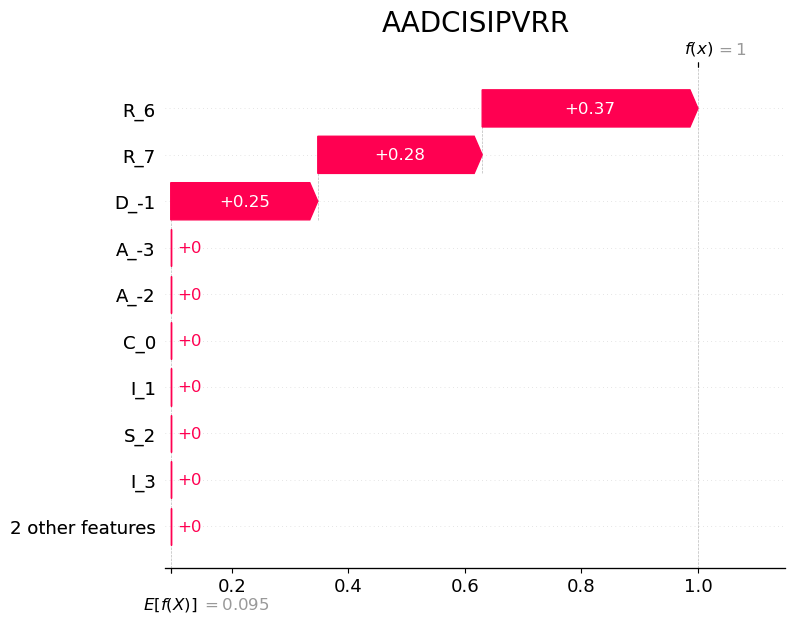

In [11]:
local_explanation("AADCISIPVRR", 2, 0.3, ion=ion, samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

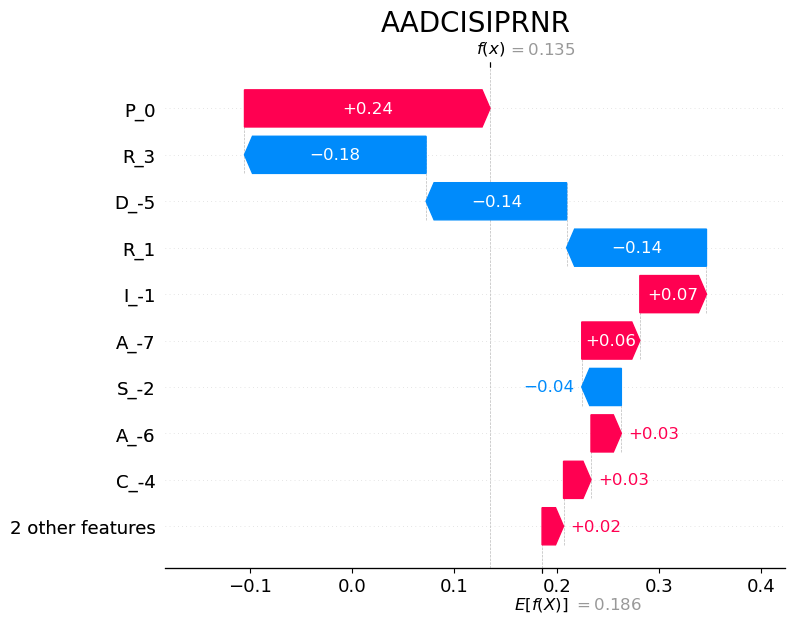

In [83]:
local_explanation("AADCISIPRNR", 2, 0.3, ion='y4+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

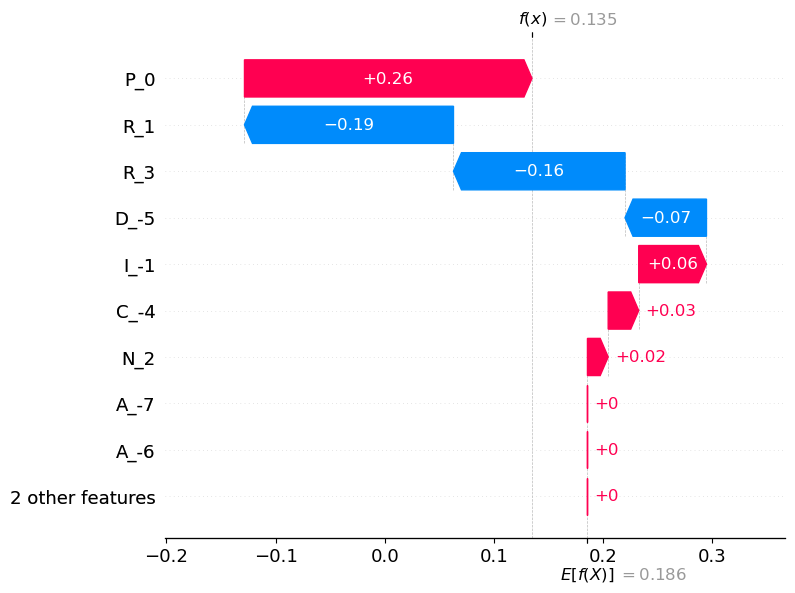

In [23]:
local_explanation("AADCISIPRNR", 2, 0.3, ion=ion, samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

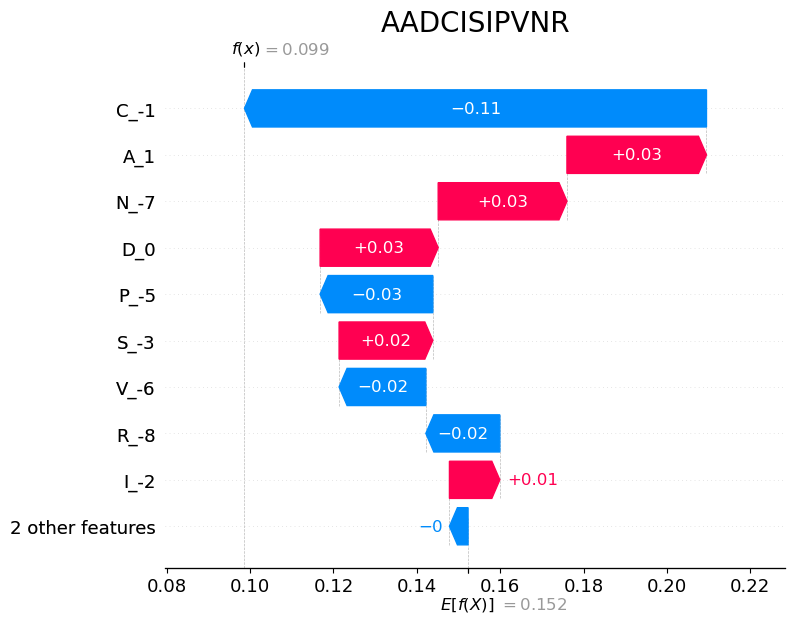

In [85]:
local_explanation("AADCISIPVNR", 2, 0.3, ion='b3+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

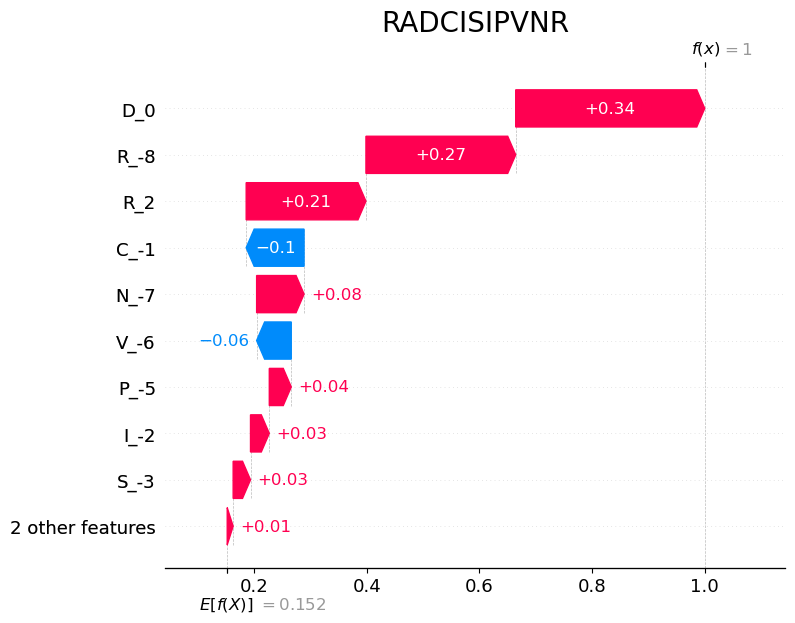

In [86]:
local_explanation("RADCISIPVNR", 2, 0.3, ion='b3+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

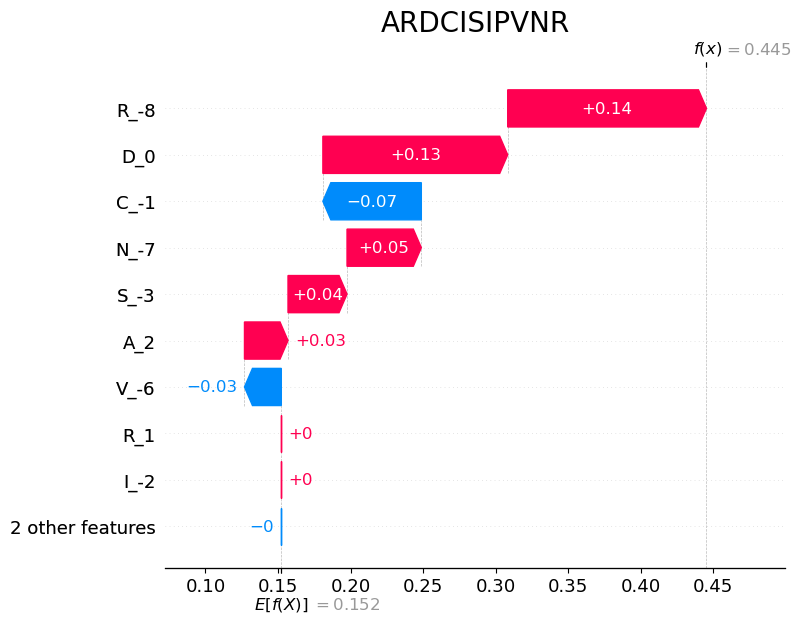

In [89]:
local_explanation("ARDCISIPVNR", 2, 0.3, ion='b3+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

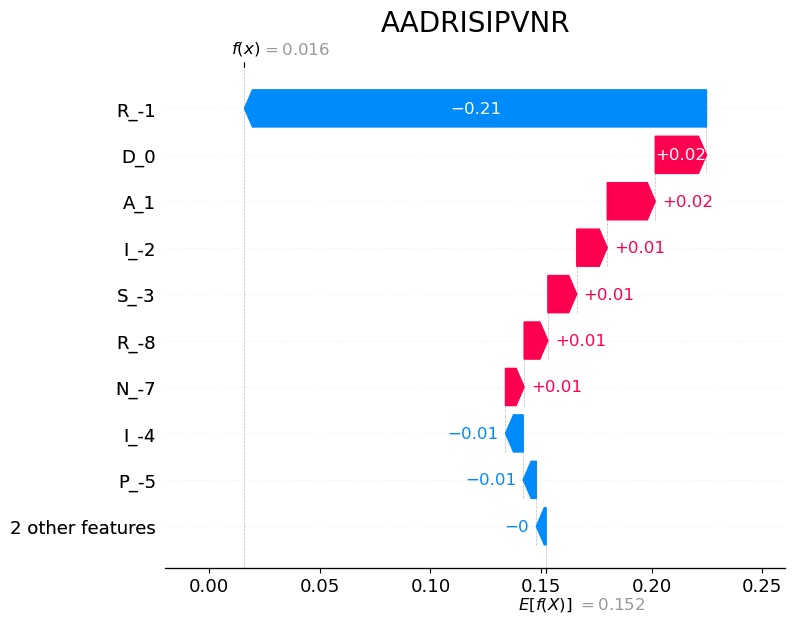

In [90]:
local_explanation("AADRISIPVNR", 2, 0.3, ion='b3+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

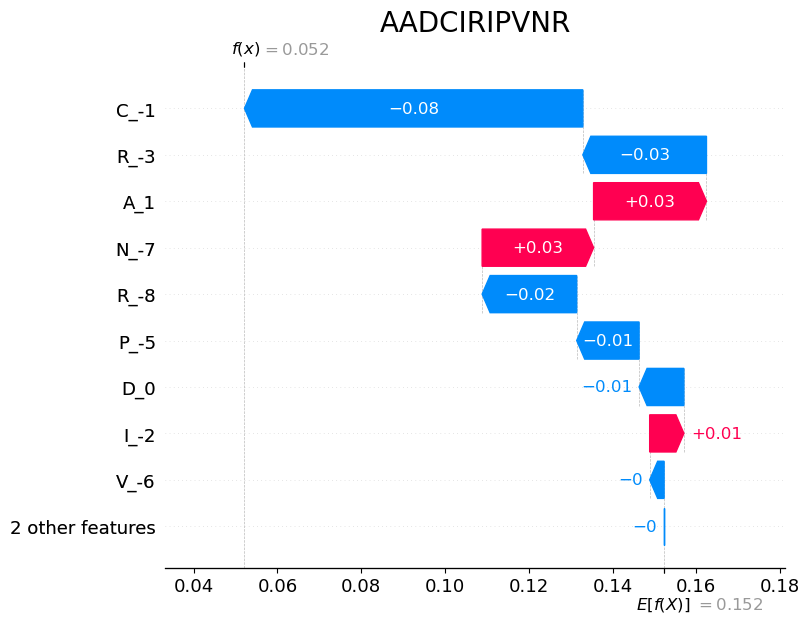

In [88]:
local_explanation("AADCIRIPVNR", 2, 0.3, ion='b3+1', samp=100)

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

Prosit_2019_intensity::   0%|          | 0/1 [00:00<?, ?it/s]

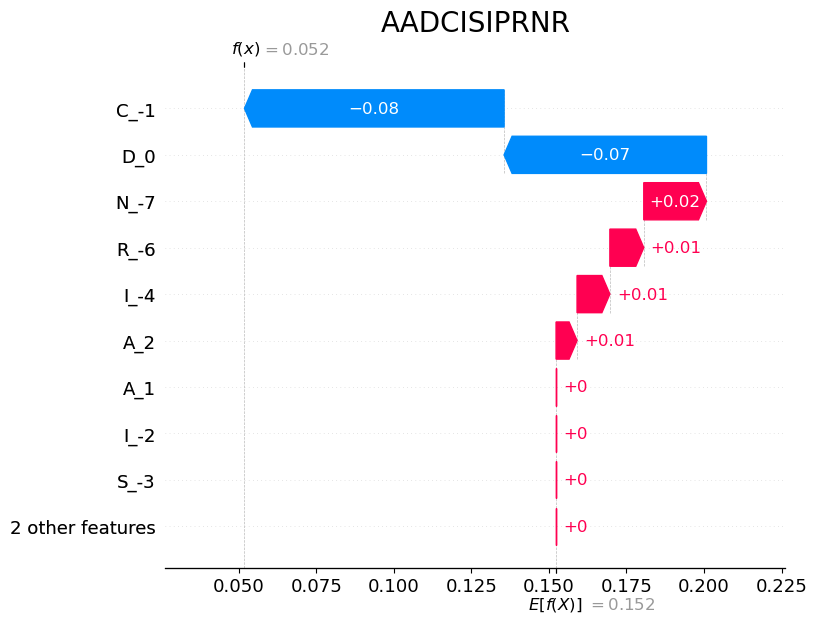

In [87]:
local_explanation("AADCISIPRNR", 2, 0.3, ion='b3+1', samp=100)